Latihan ini menentukan harga dari sebuah permata/diamond berdasarkan dataset yang diberikan menggunakan Random Forest Regression

In [1]:
#Package import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns     
from sklearn.model_selection import cross_val_predict

In [9]:
#Data Retrieval
data = pd.read_csv('diamonds.csv')
diamondData = data

In [19]:
#Dataset info
#diamondData = diamondData.drop(['Unnamed: 0'], axis=1)
print('Shape of dataset', diamondData.shape)
print('Dataset type', diamondData.dtypes)
print('Dataset summary', diamondData.describe())
diamondData.head()

Shape of dataset (53940, 10)
Dataset type carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
Dataset summary               carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y       

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
#Terdapat ukuran yang bernilai 0 pada bagian x y z yang dimana hal ini tidak mungkin terjadi atau angka nya memang terlalu kecil
#Kita akan lihat berapa jumlah row yang memliki nilai 0 pada x y z
#Lalu kita drop
print(diamondData.loc[(diamondData['x']==0) | (diamondData['y']==0) | (diamondData['z']==0)].shape)
diamondData.loc[(diamondData['x']==0) | (diamondData['y']==0) | (diamondData['z']==0)]
diamondData = diamondData[(diamondData[['x','y','z']] != 0).all(axis=1)]

(20, 10)


In [11]:
#Null Checking
diamondData.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

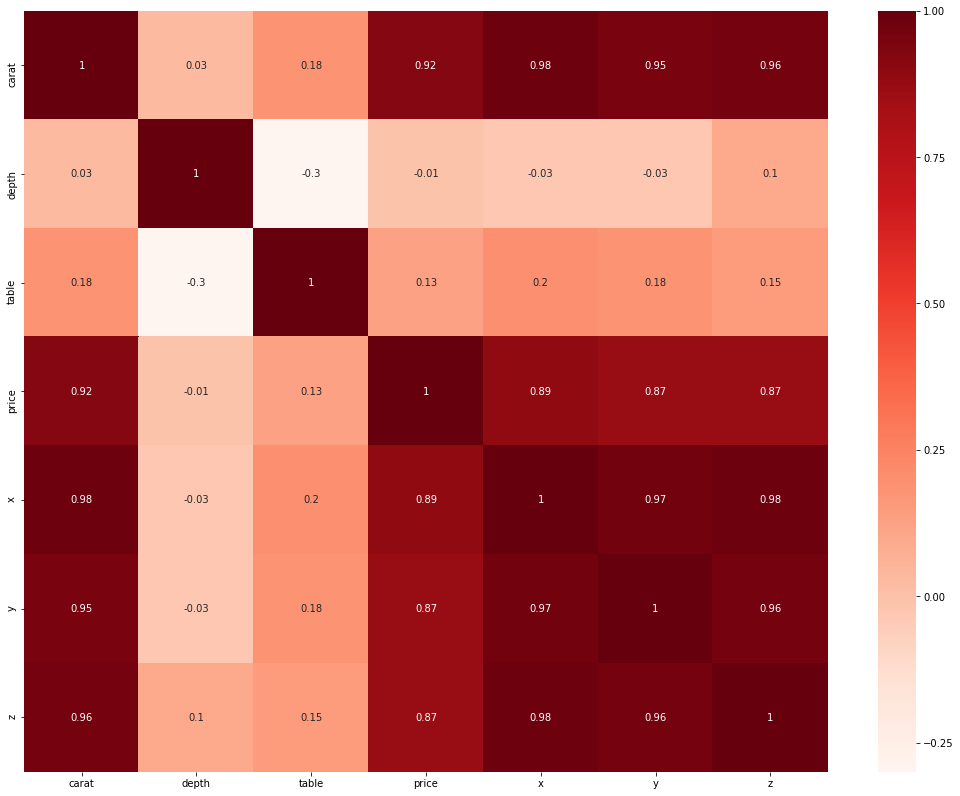

In [25]:
#Correlation matrix heatmap
plt.figure(figsize=(18,14))
sns.heatmap(round(diamondData.corr(),2), cmap='Reds', annot=True)
plt.show()

#Dapat dilihat bahwa satu satunya variabel yang berpengaruh buruk pada harga ialah ketebalan/depth dari diamond itu sendiri
#Hal ini dikarenakan semakin tebal maka diamond akan semakin gelap dan mengurangi nilai dari diamond itu sendiri

In [56]:
#Kita akan memprediksi harga diamond dari variabel yang disediakan
features = diamondData.drop(['price'], axis=1)
labels = diamondData['price']

In [57]:
#One hot encode
featurescategorical = features[['cut', 'color', 'clarity']]
featuresnumerical = features[['carat', 'depth', 'table']]

# One-hot encode the data using pandas get_dummies
featurescategorical = pd.get_dummies(featurescategorical)

features = pd.concat([featurescategorical, featuresnumerical], axis=1, sort=False)
features.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0.23,61.5,55.0
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0.21,59.8,61.0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.23,56.9,65.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.29,62.4,58.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.31,63.3,58.0


### Random Forest Regression

In [58]:
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#fit random forest
model = RandomForestRegressor(n_jobs=-1)

In [59]:
#Perform k=5 fold cross validation
predictions = cross_val_predict(model, features, labels, cv=5)
predictions[0:5]

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

array([568.6, 610.6, 379.4, 454.7, 423.8])

In [60]:
#Import mertrik skor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(labels, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(labels, predictions)
print('r2 = ',r2)
print('RMSE = ',RMSE)


r2 =  0.7801420618835252
RMSE =  1869.5790422351906
